## <center>Iris Flower Classification</center>
### <center></center>
#### <center>31st October 2023 </center>

<center><b>Khushi Pradhan</b></center>

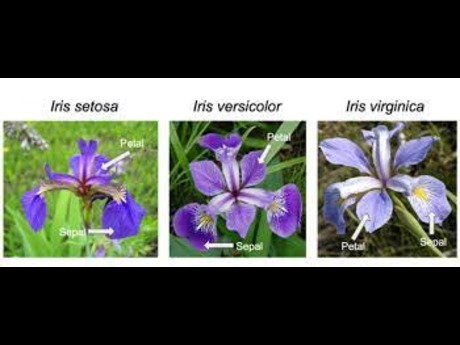

In [65]:
from IPython.display import Image, display
new_image_path="C:/Users/Madhav Pradhan/Downloads/iris_flower.jpeg"   
width = 600 
height = 600  
display(Image(filename=new_image_path, width=width, height=height))


## Phase 1: Data Cleaning and Preparation <a class="anchor" id="dataCleaning"></a> 


## Import libraries & datasets <a class="anchor" id="importDataset"></a> 

In [66]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.preprocessing import StandardScaler
import pickle
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data = pd.read_csv("iris.csv")

## Data overview <a class="anchor" id="dOverview"></a>

### 1.2.1 About dataset <a class="anchor" id="aboutDataset"></a>

Also can be found on UCI Machine Learning Repository:
http://archive.ics.uci.edu/dataset/53/iris

Attribute Information:

### 1.2.2 Health check-up of the dataset <a class="anchor" id="charDataset"></a>


“<b>Data quality</b> is one of the most important problems in data management, since dirty data often leads to inaccurate data analytics results and incorrect business decisions by <b>Ihab F. Ilyas (Author), Xu Chu (Author).”</b>

#### Check dimension of the dataset, missing values and data type.

In [67]:
data.shape#This returns a tuple representing the dimensionality of the Dataframe where the first element is the no. of rows and the second element is the no. of columns

(150, 5)

In [68]:
data.info() #checking the missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [69]:
data.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class            object
dtype: object

#### Missing value analysis

In [70]:
data.isna().mean().round(4)*100 # Missing values percentage in each column

sepal length    0.0
sepal width     0.0
petal length    0.0
petal width     0.0
class           0.0
dtype: float64

In [71]:

data['class_new'] = data['class'].map({'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3})
print(data)

     sepal length  sepal width  petal length  petal width           class  \
0             5.1          3.5           1.4          0.2     Iris-setosa   
1             4.9          3.0           1.4          0.2     Iris-setosa   
2             4.7          3.2           1.3          0.2     Iris-setosa   
3             4.6          3.1           1.5          0.2     Iris-setosa   
4             5.0          3.6           1.4          0.2     Iris-setosa   
..            ...          ...           ...          ...             ...   
145           6.7          3.0           5.2          2.3  Iris-virginica   
146           6.3          2.5           5.0          1.9  Iris-virginica   
147           6.5          3.0           5.2          2.0  Iris-virginica   
148           6.2          3.4           5.4          2.3  Iris-virginica   
149           5.9          3.0           5.1          1.8  Iris-virginica   

     class_new  
0            1  
1            1  
2            1  
3      

In [72]:
data.shape

(150, 6)

#### Drop unnecessary <b>column</b> from dataset

In [73]:
# y includes our outcome label and X includes our features
y = data.class_new 
list_drp = ['class_new','class']
X = data.drop(list_drp,axis = 1 )

In [74]:
# Get column names
col = data.columns # .columns gives columns names in data 
print(col)

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class',
       'class_new'],
      dtype='object')


<b>Check duplicate records</b>

In [75]:
dups=X.duplicated() #calculate duplicates
dups.any() #report if there are any duplicates

True


##  Phase 2: Data Exploration and visualization <a class="anchor" id = "eda"></a>


##  1.3 Statistical overview <a class="anchor" id = "sOverview"></a>


### 1.3.1 Description of the dataset<a class="anchor" id="desDataset"></a>


Statistical information can be viewed in the below table. For numerical parameters, fields like mean, standard deviation, percentiles, and maximum have been populated. This gives us a broad idea of our dataset.

In [76]:
X.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
sepal length,150.000000,5.843333,0.828066,4.300000,5.100000,5.800000,6.400000,7.900000
sepal width,150.000000,3.057333,0.435866,2.000000,2.800000,3.000000,3.300000,4.400000
petal length,150.000000,3.758000,1.765298,1.000000,1.600000,4.350000,5.100000,6.900000
petal width,150.000000,1.199333,0.762238,0.100000,0.300000,1.300000,1.800000,2.500000


In [77]:
### 1.3.2 Analysis of the outcome variable (DEATH_EVENT)<a class="anchor" id="distOutcome"></a>


Number of setosa: 50
Number of versicolor: 50
Number of virginica: 50


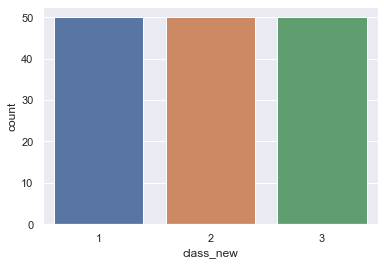

In [79]:
ax = sns.countplot(y, label="Count")
value_counts = y.value_counts()

iris_setosa_count = value_counts.get(1, 0)
iris_versicolor_count = value_counts.get(2, 0)
iris_virginica_count = value_counts.get(3, 0)

print('Number of setosa:', iris_setosa_count)
print('Number of versicolor:', iris_versicolor_count)
print('Number of virginica:', iris_virginica_count)



## 1.3.3 Distributions<a class="anchor" id="distributions"></a>

### 1.3.3.1 Distribution of all continuous independent features<a class="anchor" id="distIndependent"></a>


We applied <b>Shapiro–Wilk test</b> to all the numerical features to check whether they follow a normal distribution or not.

In [80]:
# Check normal distribution of all numerical features
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(X)
normal = normal.apply(test_normality)
print(not normal.any())

False


#### 1.3.3.2 Exploring data using violinplot<a class="anchor" id="violinplot"></a>


A violinplot is a graphical representation of data where values are depicted by color. A violin plot pursues the same activity that a whisker or box plot does.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'sepal length'),
  Text(1, 0, 'sepal width'),
  Text(2, 0, 'petal length'),
  Text(3, 0, 'petal width')])

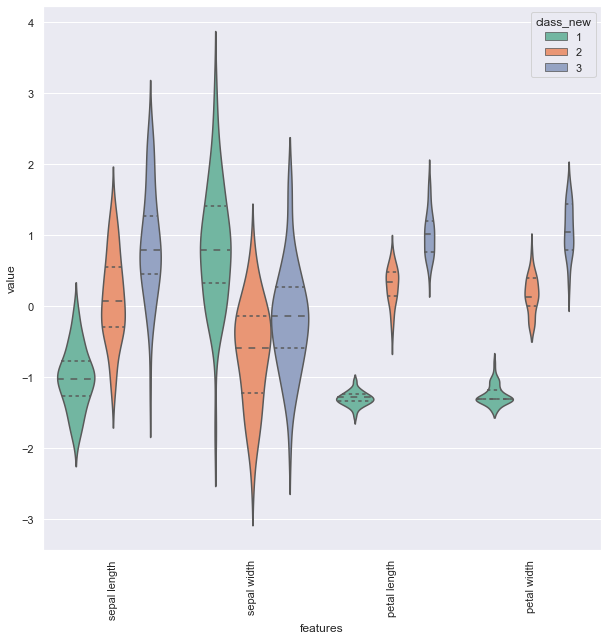

In [81]:
data_dia = y
data = X
# standardization of the data
data_n_2 = (data - data.mean()) / (data.std())
data_1 = pd.concat([y,data_n_2.iloc[:,[0,1,2,3]]],axis=1)
data_1 = pd.melt(data_1,id_vars="class_new",
                    var_name="features",
                    value_name='value')


plt.figure(figsize=(10, 10))
sns.violinplot(x="features", y="value", hue="class_new", data=data_1, inner="quart", palette="Set2")
plt.xticks(rotation=90)


#### 1.3.3.3 Exploring data using swarmplot<a class="anchor" id="swarmplot"></a>


A swarm plot is very similar to a strip plot. It is basically a scatter plot where the x axis represents a continuous variable. Typical uses of a strip plot involves applying a small random jitter value to each data point such that the separation between points becomes clearer:

(array([0, 1, 2, 3]),
 [Text(0, 0, 'sepal length'),
  Text(1, 0, 'sepal width'),
  Text(2, 0, 'petal length'),
  Text(3, 0, 'petal width')])

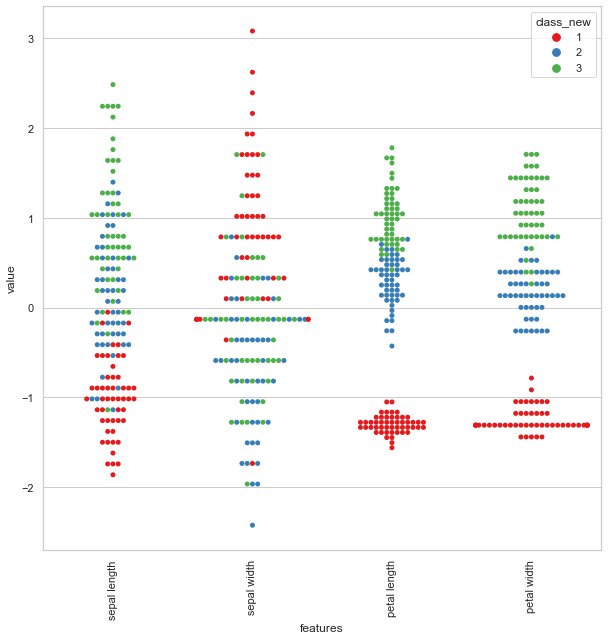

In [82]:
sns.set(style="whitegrid", palette="Set1")
data_dia = y
data = X
data_n_2 = (data - data.mean()) / (data.std())  # standardization
data_1 = pd.concat([y,data_n_2.iloc[:,[0,1,2,3]]],axis=1)
data_1 = pd.melt(data_1,id_vars="class_new",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
#tic = time.time()
sns.swarmplot(x="features", y="value", hue="class_new", data=data_1)
plt.xticks(rotation=90)

#### 1.3.3.3 Exploring data using boxplot<a class="anchor" id="boxplot"></a>


(array([0, 1, 2, 3]),
 [Text(0, 0, 'sepal length'),
  Text(1, 0, 'sepal width'),
  Text(2, 0, 'petal length'),
  Text(3, 0, 'petal width')])

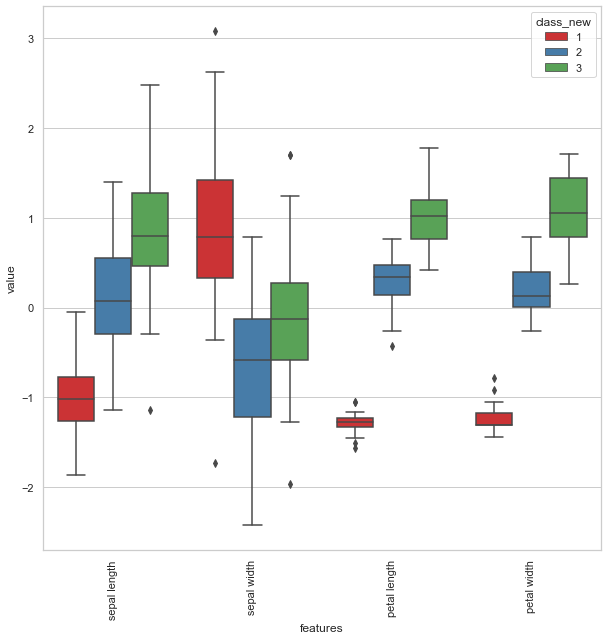

In [83]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="class_new", data=data_1)
plt.xticks(rotation=90)

## 1.3.4 Relationship<a class="anchor" id="relationship"></a>

#### 1.3.4.1 Exploring data using joint plot<a class="anchor" id="jointPlot"></a>

Check both the distribution and relationship between two variables. From above information from violin and swarm plot, lets check the correlation between similar variables. 

<b>Check correlation between concavity_worst and concave point_worst using joint plot.</b>


Text(0.1, 0.9, '$\\rho = 0.872, p = 0.000$')

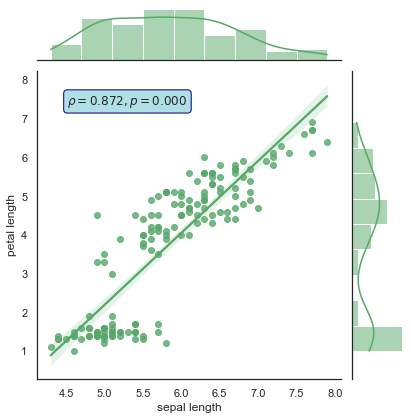

In [84]:
import scipy.stats as stats
sns.set(style="white",color_codes=True)
jp=sns.jointplot(X.loc[:,'sepal length'], X.loc[:,'petal length'], kind="reg",color="g")

#jp.annotate(stats.pearsonr(X.loc[:,'concavity_worst'], X.loc[:,'concave points_worst']))
r, p = stats.pearsonr(X.loc[:,'sepal length'], X.loc[:,'petal length'])
jp.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})

Text(0.1, 0.9, '$\\rho = -0.366, p = 0.000$')

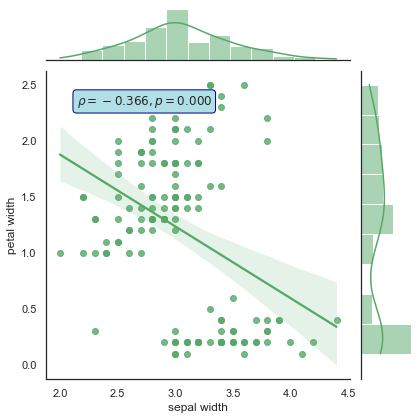

In [85]:
import scipy.stats as stats
sns.set(style="white",color_codes=True)
jp=sns.jointplot(X.loc[:,'sepal width'], X.loc[:,'petal width'], kind="reg",color="g")

#jp.annotate(stats.pearsonr(X.loc[:,'concavity_worst'], X.loc[:,'concave points_worst']))
r, p = stats.pearsonr(X.loc[:,'sepal width'], X.loc[:,'petal width'])
jp.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})

<b>Check correlation between other feature and concave other feature using joint plot.</b> 

Text(0.1, 0.9, '$\\rho = -0.118, p = 0.152$')

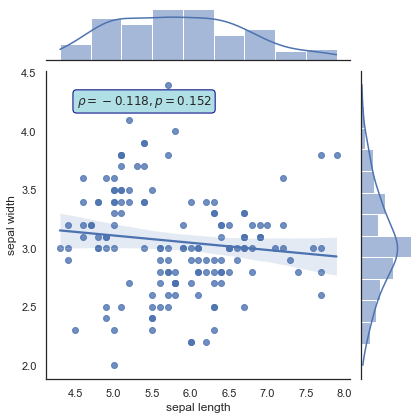

In [86]:
jp=sns.jointplot(X.loc[:,'sepal length'], X.loc[:,'sepal width'], kind="reg",color="b")
#jp.annotate(stats.pearsonr)
r, p = stats.pearsonr(X.loc[:,'sepal length'], X.loc[:,'sepal width'])
jp.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})

Text(0.1, 0.9, '$\\rho = 0.963, p = 0.000$')

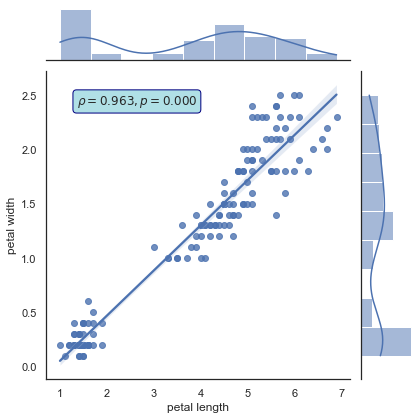

In [87]:
jp=sns.jointplot(X.loc[:,'petal length'], X.loc[:,'petal width'], kind="reg",color="b")
#jp.annotate(stats.pearsonr)
r, p = stats.pearsonr(X.loc[:,'petal length'], X.loc[:,'petal width'])
jp.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})

#### 1.3.4.2 Explore pairplots between dependent and independent features<a class="anchor" id="pairplots"></a>


Pair plots to check both the distribution of single variable and relationship between two variables.


<Figure size 720x720 with 0 Axes>

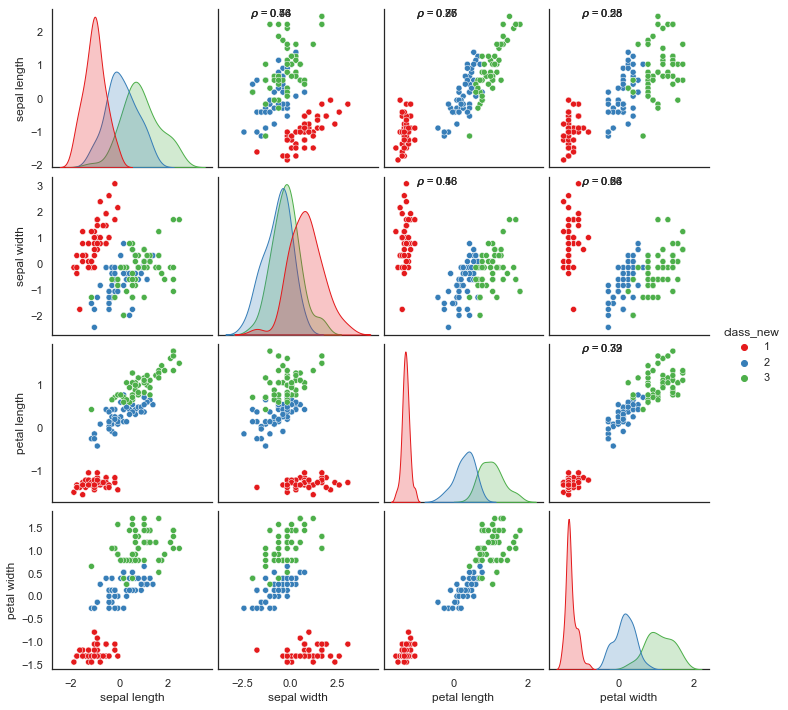

In [88]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 11, xycoords = ax.transAxes)
# First six features
data_1 = pd.concat([y,data_n_2.iloc[:,0:4]],axis=1)
plt.figure(figsize=(10,10))
grid=sns.pairplot(data=data_1,kind ="scatter",hue="class_new",palette="Set1")
grid = grid.map_upper(corr)

#### 1.3.4.3 Check heatmap of continuous features<a class="anchor" id="heatmap"></a>
[Back to Table of Contents](#bcImp)

A heatmap (or heat map) is a graphical representation of data where values are depicted by color. Here we will generate the heatmap of correlation matrix of continuous features. 

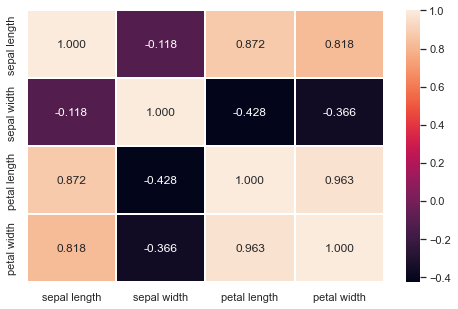

In [90]:
#correlation matrix
corrmat = X.iloc[:,[0,1,2,3]].corr()
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(corrmat, annot=True, linewidths=.3, fmt= '.3f',ax=ax);

In [91]:
corrmat

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.117570,0.871754,0.817941
sepal width,-0.117570,1.000000,-0.428440,-0.366126
petal length,0.871754,-0.428440,1.000000,0.962865
petal width,0.817941,-0.366126,0.962865,1.000000


##  Phase 3: Feature Selection <a class="anchor" id = "featureSelection"></a>


In [92]:
selected_feature_corr=X.columns
print(selected_feature_corr)

Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')


In [93]:
X_1 = X

In [94]:
print(X_1)

     sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


##  Phase 4: Model Building <a class="anchor" id = "mBuilding"></a>


### Train Test Split

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [97]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [98]:
# split data train 80 % and test 20 %
x_train,x_test,y_train,y_test = train_test_split(X_1,y, test_size=0.2, random_state=2)
display (x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(120, 4)

(120,)

(30, 4)

(30,)

 __Decision Tree__

In [99]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)
dt_pred

array([1, 1, 3, 1, 1, 2, 1, 3, 3, 1, 1, 1, 1, 1, 2, 2, 1, 2, 3, 2, 3, 2,
       3, 2, 2, 1, 1, 3, 1, 3], dtype=int64)

##  Phase 5: Model Evaluation <a class="anchor" id = "mEvaluation"></a>


### Accuracy of the model

In [100]:
accuracy_list =[]

In [101]:
#DECISION TREE
dt_acc = accuracy_score(y_test, dt_pred)
print("Accuracy of Decision Tree is : ", "{:.2f}%".format(100* dt_acc))
accuracy_list.append(100*dt_acc)

Accuracy of Decision Tree is :  93.33%


In [102]:
model_list = ['Decision tree']

In [103]:
accuracy_list

[93.33333333333333]

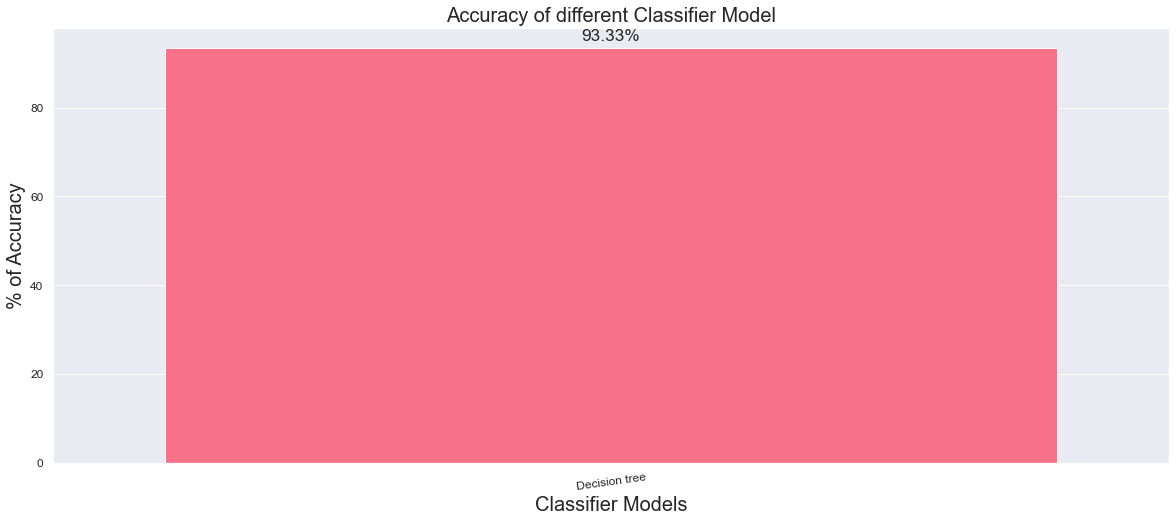

In [104]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Model', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y_1 = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y_1 + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

### Confusion Matrix

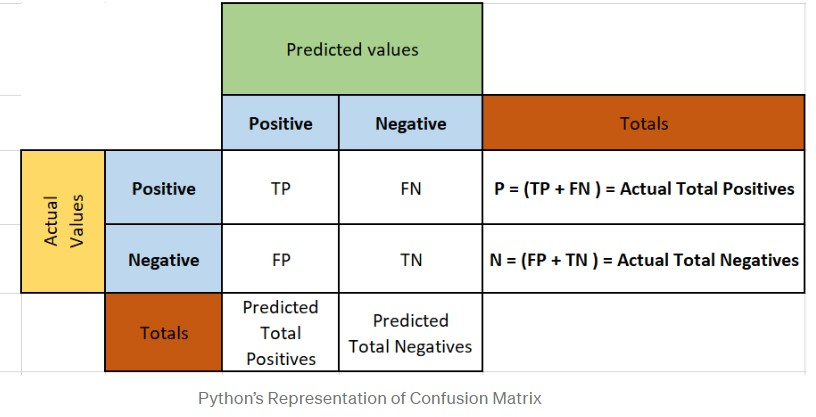
<span style="color:pink"> photo taken from https://ai.plainenglish.io/understanding-confusion-matrix-and-applying-it-on-knn-classifier-on-iris-dataset-b57f85d05cd8 </span>.

In [105]:
# Confusion matrix for Decision Tree
cm3= confusion_matrix(y_test, dt_pred)
cm3

array([[14,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  7]], dtype=int64)

In [106]:

new_data = [[7,3.2,4.7,1.4]]  # Format your new data correctly

# Predict using the model
predicted_values = dt.predict(new_data)

# Print the prediction
print("Predicted Outcome:", predicted_values[0])
if (predicted_values[0]==1):
    print("Its iris-setosa")
elif  predicted_values[0]==2:
    print("Its iris-versicolor")
else:
    print("Its iris-verginica")
    
    

Predicted Outcome: 2
Its iris-versicolor


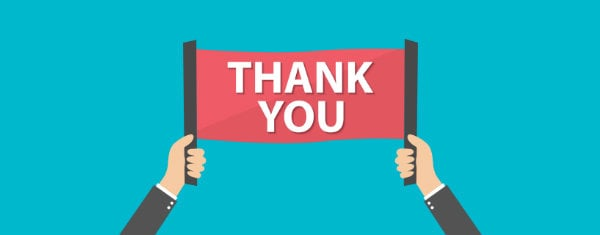
<span style="color:pink"> photo taken from https://www.elegantthemes.com/blog/tips-tricks/thank-you-emails </span>.